In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = 'drive/MyDrive/data/'

df_cet = pd.read_csv(folder+'curriculum_education_test.csv', sep=';') #нет пропусков
df_eg = pd.read_csv(folder+'education_group.csv', sep=';')#first_lesson_start_at  
df_et = pd.read_csv(folder+'education_test.csv', sep=';')
df_lesson = pd.read_csv(folder+'lesson.csv', sep=';')
df_la = pd.read_csv(folder+'lesson_attendance.csv', sep=';')
df_lc = pd.read_csv(folder+'lesson_curriculum.csv', sep=';')
df_str = pd.read_csv(folder+'student_test_result.csv', sep=';')
df_ui = pd.read_csv(folder+'user_info.csv', sep=';')

In [ ]:
df_et.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28280 entries, 0 to 28279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      28280 non-null  int64 
 1   title   28280 non-null  object
 2   type    28280 non-null  object
dtypes: int64(1), object(2)
memory usage: 662.9+ KB


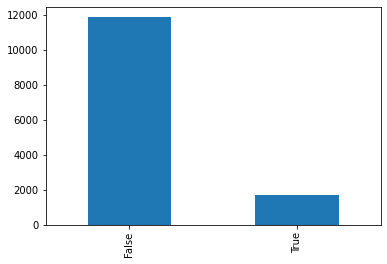

In [ ]:
df_ui.churn.value_counts().plot.bar()

In [ ]:
df_ui.churn.value_counts()

False    11840
True      1685
Name: churn, dtype: int64

In [ ]:
df_la.head()

,student_user_id,lesson_id,created_at,updated_at,type
0,172538,1022156,2022-04-06 17:26:15,2022-05-14 19:31:08,offline
1,132935,1022156,2022-04-06 17:26:15,2022-04-06 17:26:15,missed
2,300631,1022156,2022-04-06 17:26:15,2022-04-06 17:26:15,missed
3,167496,1022156,2022-04-06 17:26:15,2022-04-06 17:26:15,missed
4,313742,1022156,2022-04-06 17:26:15,2022-04-06 17:26:15,missed


##смотрим дисбаланс классов

In [ ]:
df_ui_1 = pd.read_csv('user_info.csv', sep=',')
df_ui_1.head()

,Unnamed: 0,education_group_id,user_id,contract_date,churn,AVGNTOTT,NUMOT,spent_time
0,0,27315,925873,2021-11-24 16:53:05,0,23.6875,64.0,44.390625
1,1,27315,925873,2021-11-24 16:53:05,0,23.6875,64.0,44.390625
2,2,27315,925873,2021-11-24 16:53:05,0,23.6875,64.0,44.390625
3,3,27315,925873,2021-11-24 16:53:05,0,23.6875,64.0,44.390625
4,4,27315,925873,2021-11-24 16:53:05,0,23.6875,64.0,44.390625


In [ ]:
df_ui=df_ui_1[['churn','AVGNTOTT','NUMOT','spent_time']]
df_ui

,churn,AVGNTOTT,NUMOT,spent_time
0,0,23.687500,64.0,44.390625
1,0,23.687500,64.0,44.390625
2,0,23.687500,64.0,44.390625
3,0,23.687500,64.0,44.390625
4,0,23.687500,64.0,44.390625
...,...,...,...,...
521879,0,1.904762,42.0,55.922360
521880,0,1.904762,42.0,55.922360
521881,0,1.904762,42.0,55.922360
521882,0,1.904762,42.0,55.922360


In [ ]:
df_ui['churn'].value_counts()

0    458597
1     63287
Name: churn, dtype: int64

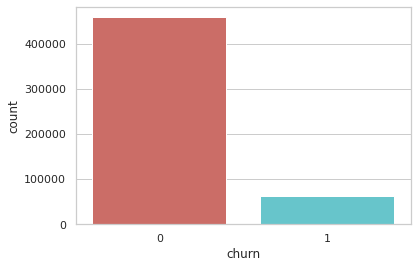

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(df_ui['churn'])
sns.countplot(x='churn', data=y_data, palette='hls')
plt.show()

In [ ]:
dfX = df_ui.drop(['churn'],axis=1)
dfy = df_ui['churn']

балансировка классов методом SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=10)

column = dfX.columns

print("До балансировки данных")
print(dfX.shape)
print(dfy.value_counts())

os_data_X, os_data_y = os.fit_resample(dfX, dfy)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['churn'])

print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

До балансировки данных
(521884, 3)
0    458597
1     63287
Name: churn, dtype: int64
После балансировки
(917194, 3)
churn
0        458597
1        458597
dtype: int64


##разделение выборки на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(os_data_X,os_data_y,test_size=0.2, stratify=os_data_y, random_state=1)

print('Обучающий набор:')
print(y_train.value_counts())
print('Тестовый набор:')
print(y_test.value_counts())

Обучающий набор:
churn
0        366878
1        366877
dtype: int64
Тестовый набор:
churn
1        91720
0        91719
dtype: int64


##Обучаем модель дерево решений

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
treeModel = DecisionTreeClassifier(criterion='entropy', max_depth=15, 
                                   min_samples_split=8, random_state=1)
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=8,
                       random_state=1)

смотрим метрики

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_pred_tree = treeModel.predict(X_test)
confmat_tree=confusion_matrix(y_true=y_test,y_pred=y_pred_tree)
print('Матрица ошибок для дерева решений:')
print(confmat_tree)

specificity_tree = confmat_tree[1][1]/(confmat_tree[1][0] + confmat_tree[1][1])
sensitivity_tree = confmat_tree[0][0]/(confmat_tree[0][0] + confmat_tree[0][1])

print(r'Чувствительность (Дерево решений): %.3f'%sensitivity_tree)
print(r'Специфичность    (Дерево решений): %.3f'%specificity_tree)

probsTree = treeModel.predict_proba(X_test)
predsTree = probsTree[:,1]
fprTree, tprTree, thresholdTree = roc_curve(y_test, predsTree)
roc_aucTree = auc(fprTree, tprTree)
print(r'AUC              (Дерево решений): %.3f'%roc_aucTree)

Матрица ошибок для дерева решений:
[[76215 15504]
 [29002 62718]]
Чувствительность (Дерево решений): 0.831
Специфичность    (Дерево решений): 0.684
AUC              (Дерево решений): 0.862


выводим наиболее важные признаки

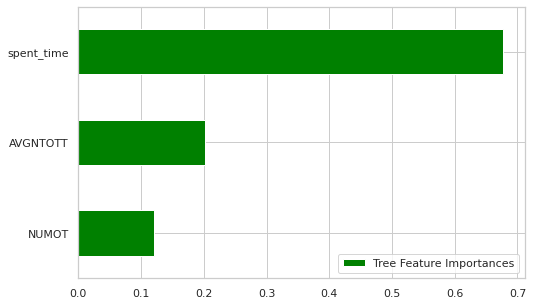

In [ ]:
treeImportances = pd.DataFrame(treeModel.feature_importances_,index=dfX.columns,
                               columns=['Tree Feature Importances']).sort_values(['Tree Feature Importances'],ascending=True)
treeImportances=treeImportances[-10:]
treeImportances.plot.barh(figsize=(8,5),color='green')

подбираем гиперпараметры модели

In [ ]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],'max_depth':[10,12,14,16], 'min_samples_split':[10,8,6]}
gridTree = GridSearchCV(estimator = model, param_grid = parameters)
gridTree.fit(X_train, y_train)
print(f'Верность (Acc) лучшей модели: {round(gridTree.best_score_,3)}')
print(f'Лучшие параметры модели: {gridTree.best_params_}')
bestTreeModel = gridTree.best_estimator_
y_pred_treeGrid=bestTreeModel.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_treeGrid))

KeyboardInterrupt: ignored

In [ ]:
probsBestTree = bestTreeModel.predict_proba(X_test)
predsBestTree = probsBestTree[:,1]
fprBestTree,tprBestTree,thresholdBestTree = roc_curve(y_test, predsBestTree)
roc_aucBestTree = auc(fprBestTree, tprBestTree)
print(f'Значение AUC для лучшей модели = %.3f'%roc_aucBestTree)

##Модель случайного леса

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=3, 
                                   min_samples_split=8, random_state=1) 
rfModel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=8,
                       n_estimators=3, random_state=1)

In [ ]:
y_pred_rf_tree = rfModel.predict(X_test)
confmat_tree=confusion_matrix(y_true=y_test,y_pred=y_pred_rf_tree)
print('Матрица ошибок для дерева решений:')
print(confmat_tree)

specificity_tree = confmat_tree[1][1]/(confmat_tree[1][0] + confmat_tree[1][1])
sensitivity_tree = confmat_tree[0][0]/(confmat_tree[0][0] + confmat_tree[0][1])

print(r'Чувствительность (Дерево решений): %.3f'%sensitivity_tree)
print(r'Специфичность    (Дерево решений): %.3f'%specificity_tree)

probsRFTree = rfModel.predict_proba(X_test)
predsRFTree = probsRFTree[:,1]
fprTree, tprTree, thresholdTree = roc_curve(y_test, predsRFTree)
roc_aucRFTree = auc(fprTree, tprTree)
print(r'AUC              (Дерево решений): %.3f'%roc_aucRFTree)

Матрица ошибок для дерева решений:
[[62679 29040]
 [42956 48764]]
Чувствительность (Дерево решений): 0.683
Специфичность    (Дерево решений): 0.532
AUC              (Дерево решений): 0.632


выводим наиболее важные признаки

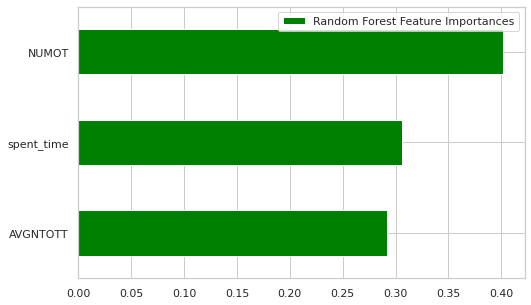

In [ ]:
rftreeImportances = pd.DataFrame(rfModel.feature_importances_,index=dfX.columns,
                               columns=['Random Forest Feature Importances']).sort_values(['Random Forest Feature Importances'],ascending=True)
rftreeImportances=rftreeImportances[-10:]
rftreeImportances.plot.barh(figsize=(8,5),color='green')

подбираем гиперпараметры для случайного леса

In [ ]:
model = RandomForestClassifier()
parameters = {'criterion':['gini','entropy'],'max_depth':[10,12,14,16], 'n_estimators':[3,5,10], 'min_samples_split':[10,8,6]}
gridRF = GridSearchCV(estimator = model, param_grid = parameters)
gridRF.fit(X_train, y_train)
print(f'Верность (Acc) лучшей модели: {round(gridRF.best_score_,3)}')
print(f'Лучшие параметры модели: {gridRF.best_params_}')
bestRFModel = gridRF.best_estimator_
y_pred_RFGrid=bestRFModel.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_RFGrid))

In [ ]:
probsBestRF = bestRFModel.predict_proba(X_test)
predsBestRF = probsBestRF[:,1]
fprBestRF,tprBestRF,thresholdBestRF = roc_curve(y_test, predsBestRF)
roc_aucBestRF = auc(fprBestRF, tprBestRF)
print(f'Значение AUC для лучшей модели = %.3f'%roc_aucBestRF)

##CatBoost

вывод важных признаков

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, cv

model = CatBoostClassifier()
model.fit(X = X_train, y = y_train)

cat_imp = pd.Series(model.get_feature_importance(),
                         X_train.columns)
fig, ax = plt.subplots(figsize=(16,14))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

Learning rate set to 0.172395
0:	learn: 0.6552706	total: 179ms	remaining: 2m 59s
1:	learn: 0.6395912	total: 287ms	remaining: 2m 22s
2:	learn: 0.6277949	total: 403ms	remaining: 2m 13s
3:	learn: 0.6211006	total: 517ms	remaining: 2m 8s
4:	learn: 0.6142159	total: 635ms	remaining: 2m 6s
5:	learn: 0.6113754	total: 746ms	remaining: 2m 3s
6:	learn: 0.6093032	total: 851ms	remaining: 2m
7:	learn: 0.6053943	total: 964ms	remaining: 1m 59s
8:	learn: 0.6026778	total: 1.18s	remaining: 2m 9s
9:	learn: 0.5999329	total: 1.43s	remaining: 2m 21s
10:	learn: 0.5979770	total: 1.72s	remaining: 2m 35s
11:	learn: 0.5957598	total: 2.02s	remaining: 2m 46s
12:	learn: 0.5937000	total: 2.25s	remaining: 2m 50s
13:	learn: 0.5920842	total: 2.5s	remaining: 2m 56s
14:	learn: 0.5893731	total: 2.76s	remaining: 3m 1s
15:	learn: 0.5874239	total: 3.02s	remaining: 3m 5s
16:	learn: 0.5861184	total: 3.2s	remaining: 3m 5s
17:	learn: 0.5842362	total: 3.52s	remaining: 3m 12s
18:	learn: 0.5827844	total: 3.74s	remaining: 3m 13s
19:	l

KeyboardInterrupt: ignored

In [ ]:
parameters = {'learning_rate': [0.03, 0.1],
              'depth': [4, 6, 10],
              'l2_leaf_reg': [1, 3, 5, 7, 9]
              }
              
grid = GridSearchCV(CatBoostClassifier(),parameters)

model = grid.fit(X_train, y_train)
  
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

model.best_estimator_.fit(X_train, y_train)
  
y_pred = model.best_estimator_.predict(X_test)